# Spark GraphFrames - Solutions

Before running present notebook please install the GraphFrames package into your cluster by following the steps in the pdf available with this notebook.  
To check you have everything setup correctly run the below code and make sure there are no errors. If you get a message about connecting to a cluster click ok.

In [ ]:
#import the package we just installed
from graphframes import *
#import data types - All data types of Spark SQL are located in the package of pyspark.sql.types
from pyspark.sql.types import *
#row can be used to create a row object by using named arguments
from pyspark.sql import Row
from pyspark.sql.functions import col


<b>Graphs:</b> Graphs are mathematical structures used to model pairwise relations between objects. A graph in this context is made up of vertices (also called nodes or points) which are connected by edges (also called links or lines). A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically; see Graph (discrete mathematics) for more detailed definitions and for other variations in the types of graph that are commonly considered (follow this link: https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)). Graphs are one of the prime objects of study in discrete mathematics.

![image](https://mathinsight.org/media/image/image/small_undirected_network_labeled.png)

Graph processing is important aspect of analysis that applies to a lot of use cases. Fundamentally graph theory and processing are about defining relationships between different nodes and edges. Nodes or vertices are the units while edges define the relationships between nodes. This works great for social network analysis and running algorithms like PageRank to better understand and weigh relationships.

Some business use cases could be to look at central people in social networks [who is most popular in a group of friends], importance of papers in bibliographic networks [which papers are most referenced], and of course ranking web pages.

## Pagerank

For this class we will look into the page rank algorithm again but this time  from another point of view. As you might remenber, the page rank of a particular web page indicates its relative importance within a group of web pages. The higher the page rank, the higher up it will appear in a search result list. The importance of a page is defined by the importance of all the web pages that provide an outbound link to the web page in consideration. For example, say that web page X has very high relative importance. Web page X is outbounding to web page Y (webpage X links to Y); hence, web page Y will also have high importance. However, if webpage X links to many webpages, including Y, the importance of Y is lower.

For more information on pagerank you either:

Follow through the worked example: https://www.cs.princeton.edu/~chazelle/courses/BIB/pagerank.htm

Take a look at one of the many youtube explanations, for example (10min): https://www.youtube.com/watch?v=qpIqLjfcabs

Part of what is important here is to understand the data format we use to represent a graph. I have commented the steps below:

In [ ]:
# First we start with the list of vertices, I have 5 vertices here, each named with a letter of the alphabet
verticesList = ['a', 'b', 'c', 'd']
# We load this list into an RDD as we have seen before
verticesListRDD = sc.parallelize(verticesList, 1)
# We convert this RDD to a dataframe using row objects and specifying a schema.
verticesListRowsRDD = verticesListRDD.map( lambda data : Row(data))
verticesSchema = StructType([StructField('id', StringType(), True)])
verticesDataFrame = verticesListRowsRDD.toDF(verticesSchema).persist()
#Here I show the schema of the Dataframe.
verticesDataFrame.show()

+---+
| id|
+---+
|  a|
|  b|
|  c|
|  d|
+---+



Next we need to know how the vertices are connected, a list of edges. The process is very similar to that we just saw.

First, we have to create a list of edges. Each edge in the list will be defined by a tuple.

Then, we have to create an RDD of edges.

Thereafter, we have to transform our RDD to an RDD of row objects. This will be followed by creating a schema and a DataFrame of edges. Let’s perform the steps:

In [ ]:
edgeDataList = [('a','b'), ('a','c'), ('a','d'), ('b', 'c'),
('b', 'd'),('c', 'b'), ('d', 'a'), ('d', 'c')]
sourceColumn = StructField('src', StringType(),True)
destinationColumn = StructField('dst', StringType(), True)
edgeSchema = StructType([sourceColumn, destinationColumn])
edgeRDD = sc.parallelize(edgeDataList, 1)
edgeRDDRows = edgeRDD.map( lambda data : Row(data[0], data[1]))
edgeDataFrame = edgeRDDRows.toDF(edgeSchema).persist()
edgeDataFrame.show()

+---+---+
|src|dst|
+---+---+
|  a|  b|
|  a|  c|
|  a|  d|
|  b|  c|
|  b|  d|
|  c|  b|
|  d|  a|
|  d|  c|
+---+---+



At this moment, we have `verticesDataFrame`, a DataFrame of vertices; and `edgeDataFrame`, a DataFrames of edges. Using these two, we can create our graph. The GraphFrame Python class is defined under the `graphframes.graphframe` submodule. GraphFrame() takes the vertices and edges DataFrames and returns a GraphFrames object. We have our `GraphFrames` object, `ourGraph`. We can fetch all the vertices as follows: In `GraphFrames`, we can create a graph by using the following code lines:

**If you get an error on the below cell make sure you installed the correct version of dataframes**

In [ ]:
from graphframes import *

ourGraph = GraphFrame(verticesDataFrame, edgeDataFrame)
ourGraph.vertices.show()
ourGraph.edges.show()

+---+
| id|
+---+
|  a|
|  b|
|  c|
|  d|
+---+

+---+---+
|src|dst|
+---+---+
|  a|  b|
|  a|  c|
|  a|  d|
|  b|  c|
|  b|  d|
|  c|  b|
|  d|  a|
|  d|  c|
+---+---+



#### VISUALIZATION OF THE NETWORK
note that the library that i will use to visualize the network is not a big data scale graph visualization tool. This serves ONLY for you to have a idea of the graph we just created.

for you reference big data capable software tools are:

* Gephi: Gephi is a popular open-source network visualization tool capable of handling networks with up to a million nodes and edges.

* Graphistry: Graphistry uses GPU acceleration for handling and visualizing large graphs and can be integrated with PySpark. However, it's a commercial product.


In [ ]:
# Requirements
!pip install 'scipy>=1.8'
!pip install 'networkx<2.7'

     |███▎                    

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 34.5 MB 42.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.2
    Uninstalling scipy-1.6.2:
      Successfully uninstalled scipy-1.6.2
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 1.9 MB 4.6 MB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


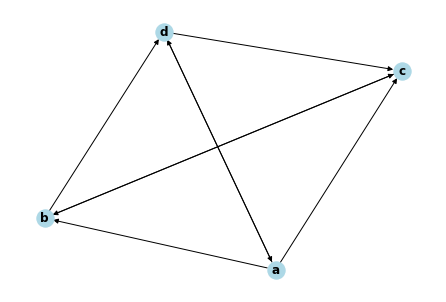

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph
G = nx.DiGraph()

# Add vertices to the graph
for vertex in verticesList:
    G.add_node(vertex)

# Add edges to the graph
for edge in edgeDataList:
    G.add_edge(edge[0], edge[1])

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', arrows=True)
plt.show()

### Some simple analysis

In [ ]:
# View the inDegrees (the number of edges directed into a vertex)
print(ourGraph.inDegrees.show())



+---+--------+
| id|inDegree|
+---+--------+
|  d|       2|
|  c|       3|
|  b|       2|
|  a|       1|
+---+--------+

None


In [ ]:
# View the outDegrees (the number of edges directed out of a vertex)
print(ourGraph.outDegrees.show())

+---+---------+
| id|outDegree|
+---+---------+
|  d|        2|
|  c|        1|
|  b|        2|
|  a|        3|
+---+---------+

None


Page rank for pages can be found by using the `pageRank()` function, which is defined on the GraphFrames object.

`pageRank()` function take two arguments: first is resetProbability (is the alpha explained below) and the second is maxIter

Informally Page Rank Explanation: consider someone browsing the web ("surfer"). At every page, the surfer either follows a link on the page to another page or does something else. When following a link, without any other information, the surfer picks a link from the page at random and follows that one. When “doing something else,” the surfer moves to a random page on the web and restarts the surfing. To generate a simple model, we assume both of these behaviors even though they may seem ridiculous. When stated mathematically, this random surfer model is called a Markov chain because the behavior of the surfer only depends upon the current page and not the history of previous pages. Let α be the probability that the surfer follows a link; then 1 − α is the probability that the surfer “does something else.” 

Now imagine that we let the surfer run for a long time. The PageRank of a page is the probability of finding the surfer at that page as the surfing time becomes infinite. A key assumption behind PageRank is that pages where we are more likely to find the random surfer are more important pages and thus we can view the PageRank as a measure of the page’s importance.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/69/PageRank-hi-res.png" style="width:750px">

*Source: https://web.stanford.edu/group/SOL/dissertations/pagerank-sensitivity-thesis-online.pdf*

In [ ]:
pageRanks = ourGraph.pageRank(resetProbability=0.15, maxIter = 5)

In [ ]:
pageRanks.vertices.show()

+---+------------------+
| id|          pagerank|
+---+------------------+
|  a|0.5169666927083334|
|  d|0.8798845717592593|
|  b|1.3562974710648146|
|  c|1.2468512644675924|
+---+------------------+



## More graphframes applications

Let's look at a slightly more interesting dataset. Look at the code below, you should see we are loading a number of people as vertices, then they can either connect as friends (bi-directional) or one can follow another (uni directional).

In [ ]:

vertices = spark.createDataFrame([('1', 'Carter', 'Derrick', 50), 
                                  ('2', 'May', 'Derrick', 26),
                                 ('3', 'Mills', 'Jeff', 80),
                                  ('4', 'Hood', 'Robert', 65),
                                  ('5', 'Banks', 'Mike', 93),
                                 ('98', 'Berg', 'Tim', 28),
                                 ('99', 'Page', 'Allan', 16)],
                                 ['id', 'name', 'firstname', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'), 
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('1', '4', 'follows'),
                               ('4', '5', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])
g = GraphFrame(vertices, edges)
## Take a look at the DataFrames
g.vertices.show()
g.edges.show()
## Check the number of edges of each vertex
g.degrees.show()

+---+------+---------+---+
| id|  name|firstname|age|
+---+------+---------+---+
|  1|Carter|  Derrick| 50|
|  2|   May|  Derrick| 26|
|  3| Mills|     Jeff| 80|
|  4|  Hood|   Robert| 65|
|  5| Banks|     Mike| 93|
| 98|  Berg|      Tim| 28|
| 99|  Page|    Allan| 16|
+---+------+---------+---+

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  1|  4|follows|
|  4|  5|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+

+---+------+
| id|degree|
+---+------+
|  1|     5|
|  2|     3|
|  3|     7|
|  5|     4|
|  4|     5|
| 98|     2|
| 99|     2|
+---+------+



Undirected graphs have edges that do not have a direction. The edges indicate a two-way relationship, in that each edge can be traversed in both directions. If your DataFrame only consist of two-way directed edges, you may be interested in analyzing undirected edges. You can convert your graph by mapping a function over the edges DataFrame that deletes the row if src ≥ dst (or the other way around). Then each edge is only included once.

Start from the dataframe called edges, notice that directional edges are listed [a,b, follows] where a < b (so the lowest number edge is listed first), uniderctional edges are listed twice.



In [ ]:
# Create a new dataframe edge that only contains edges in one direction
edgesUnidirectional = edges.where(edges.src > edges.dst)
edgesUnidirectional.show()

+---+---+------+
|src|dst|  type|
+---+---+------+
|  2|  1|friend|
|  3|  1|friend|
|  4|  3|friend|
|  5|  3|friend|
| 99| 98|friend|
+---+---+------+



We can filter edges and vertices directly as well. If we want to work with a GraphFrame with only follows and people over 30 for example we can use a subgraph, for example:

In [ ]:
g.filterEdges("type = 'follows'").filterVertices("age > 30").edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  4|follows|
|  4|  5|follows|
|  4|  5|follows|
+---+---+-------+



<b> Degrees </b> One question we might be interested in is how many inbound and outbound connections each vertices has, we can use the inDegrees and outDegrees functions to calculate this:

In [ ]:
g.inDegrees.show()
g.outDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  2|       1|
|  1|       2|
|  3|       4|
|  5|       3|
|  4|       2|
| 98|       1|
| 99|       1|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  1|        3|
|  3|        3|
|  2|        2|
|  4|        3|
|  5|        1|
| 98|        1|
| 99|        1|
+---+---------+



<b> Motif </b> All networks, including biological networks, social networks, technological networks (e.g., computer networks and electrical circuits) and more, can be represented as graphs, which include a wide variety of subgraphs. One important local property of networks are so-called network motifs, which are defined as recurrent and statistically significant sub-graphs or patterns.

Network motifs are sub-graphs that repeat themselves in a specific network or even among various networks. Each of these sub-graphs, defined by a particular pattern of interactions between vertices, may reflect a framework in which particular functions are achieved efficiently. Indeed, motifs are of notable importance largely because they may reflect functional properties. They have recently gathered much attention as a useful concept to uncover structural design principles of complex networks. Although network motifs may provide a deep insight into the network’s functional abilities, their detection is computationally challenging.

GraphFrame motif finding uses a simple Domain-Specific Language (DSL) for expressing structural queries. For example, graph.find("(a)-[e]->(b); (b)-[e2]->(a)") will search for pairs of vertices a,b connected by edges in both directions. It will return a DataFrame of all such structures in the graph, with columns for each of the named elements (vertices or edges) in the motif. In this case, the returned columns will be “a, b, e, e2.”

DSL for expressing structural patterns:

The basic unit of a pattern is an edge. For example, "(a)-[e]->(b)" expresses an edge e from vertex a to vertex b. Note that vertices are denoted by parentheses (a), while edges are denoted by square brackets [e].

A pattern is expressed as a union of edges. Edge patterns can be joined with semicolons. Motif "(a)-[e]->(b); (b)-[e2]->(c)" specifies two edges from a to b to c.

Within a pattern, names can be assigned to vertices and edges. For example, "(a)-[e]->(b)" has three named elements: vertices a,b and edge e. These names serve two purposes:

*  The names can identify common elements among edges. For example, "(a)-[e]->(b); (b)-[e2]->(c)" specifies that the same vertex b is the destination of edge e and source of edge e2.

*  The names are used as column names in the result DataFrame. If a motif contains named vertex a, then the result DataFrame will contain a column “a” which is a StructType with sub-fields equivalent to the schema (columns) of GraphFrame.vertices. Similarly, an edge e in a motif will produce a column “e” in the result DataFrame with sub-fields equivalent to the schema (columns) of GraphFrame.edges.

*  Be aware that names do not identify distinct elements: two elements with different names may refer to the same graph element. For example, in the motif "(a)-[e]->(b); (b)-[e2]->(c)", the names a and c could refer to the same vertex. To restrict named elements to be distinct vertices or edges, use post-hoc filters such as resultDataframe.filter("a.id != c.id").

It is acceptable to omit names for vertices or edges in motifs when not needed. E.g., "(a)-[]->(b)" expresses an edge between vertices a,b but does not assign a name to the edge. There will be no column for the anonymous edge in the result DataFrame. Similarly, "(a)-[e]->()" indicates an out-edge of vertex a but does not name the destination vertex. These are called anonymous vertices and edges.

An edge can be negated to indicate that the edge should not be present in the graph. E.g., "(a)-[]->(b); !(b)-[]->(a)" finds edges from a to b for which there is no edge from b to a.

For more information: http://graphframes.github.io/graphframes/docs/_site/user-guide.html#motif-finding

A worked example is available here with a few motif patterns applied. They use Scala as opposed to Python but you can ignore the code outside of the patterns they use: http://www.twesdai.com/2017/09/15/motif-analysis-using-apache-spark-graphframes/

Let's look at a simple example to try to make how this works clear. Imagine we might want to find all people that have a common friend with person 1, but are not friends with person one. First we find all common friends. Take a look at the find method, we look for where a is connected to b, b connected to c, but a not connected to c. In the next step we filter for results with person 1.

In [ ]:
g.find("(a)-[]->(b); !(b)-[]->(a)").dropDuplicates().select("a.id", "b.id").show()

+---+---+
| id| id|
+---+---+
|  2|  3|
|  1|  4|
|  4|  5|
+---+---+



We could find the same by specifing a condition on the edges.

In [ ]:
g.find("()-[e1]->()").filter("e1.type = 'follows'").show()

+---------------+
|             e1|
+---------------+
|{2, 3, follows}|
|{1, 4, follows}|
|{4, 5, follows}|
|{4, 5, follows}|
+---------------+



Find everyone connected to someone under 30. Display their id, name and age.

In [ ]:
g.find("()-[e1]->(b)").filter("b.age < 30").select("b.id","b.name","b.age").show()

+---+----+---+
| id|name|age|
+---+----+---+
|  2| May| 26|
| 98|Berg| 28|
| 99|Page| 16|
+---+----+---+



#### Pratice Exercises

Find all friend relationships without filtering on edges (so specifying the network structure of the motif you want to find).

In [ ]:
g.find("(a)-[]->(b); (b)-[]->(a)").dropDuplicates().show()

+--------------------+--------------------+
|                   a|                   b|
+--------------------+--------------------+
|{3, Mills, Jeff, 80}|{5, Banks, Mike, 93}|
|{1, Carter, Derri...|{3, Mills, Jeff, 80}|
| {98, Berg, Tim, 28}|{99, Page, Allan,...|
|{1, Carter, Derri...|{2, May, Derrick,...|
|{2, May, Derrick,...|{1, Carter, Derri...|
|{4, Hood, Robert,...|{3, Mills, Jeff, 80}|
|{3, Mills, Jeff, 80}|{1, Carter, Derri...|
|{3, Mills, Jeff, 80}|{4, Hood, Robert,...|
|{99, Page, Allan,...| {98, Berg, Tim, 28}|
|{5, Banks, Mike, 93}|{3, Mills, Jeff, 80}|
+--------------------+--------------------+



Find all the people who are older than 60 and have at least one friend.

In [ ]:
g.find("(a)-[e]->(b)").filter("a.age > 60 AND e.type = 'friend'").select("a.id").distinct().show()

+---+
| id|
+---+
|  3|
|  5|
|  4|
+---+



<b>Connected components</b> A connected component of a graph is a subgraph in which any two vertices are connected to each other by one or more edges, and which is connected to no additional vertices in the supergraph. In the graph below there would be 5 connected component subgraphs:

![image](http://lemon.cs.elte.hu/pub/doc/1.2.3/connected_components.png)



Graphframes can compute the connected component membership of each vertex and return a DataFrame with each vertex assigned a component ID. The GraphFrames connected components implementation can take advantage of checkpointing to improve performance. This will take up tp 10 min to run.

In [ ]:
sc.setCheckpointDir("/tmp/graphframes-example-connected-components")
result_cc = g.connectedComponents()
result_cc.show()

+---+------+---------+---+------------+
| id|  name|firstname|age|   component|
+---+------+---------+---+------------+
|  1|Carter|  Derrick| 50|154618822656|
|  2|   May|  Derrick| 26|154618822656|
|  3| Mills|     Jeff| 80|154618822656|
|  4|  Hood|   Robert| 65|154618822656|
|  5| Banks|     Mike| 93|154618822656|
| 98|  Berg|      Tim| 28|317827579904|
| 99|  Page|    Allan| 16|317827579904|
+---+------+---------+---+------------+



In [ ]:
result_scc = g.stronglyConnectedComponents(maxIter=10)
result_scc.select("id", "component").orderBy("component").show()

+---+------------+
| id|   component|
+---+------------+
|  5|154618822656|
|  4|154618822656|
|  2|154618822656|
|  1|154618822656|
|  3|154618822656|
| 98|317827579904|
| 99|317827579904|
+---+------------+



The Label Propagation algorithm (LPA) is a fast algorithm for finding communities in a graph. In the context of social networks, a community could represent users with shared interests or characteristics. Apply the label propogation algorithm with a max of 100 iterations.

In [ ]:
result = g.labelPropagation(maxIter=10)

# Display the detected communities
result.select("id", "label").show()

+---+------------+
| id|       label|
+---+------------+
|  3|420906795008|
| 98|317827579904|
| 99|326417514496|
|  5|420906795008|
|  1|420906795008|
|  4|420906795008|
|  2|420906795008|
+---+------------+



Let's use this information to colour our graph.

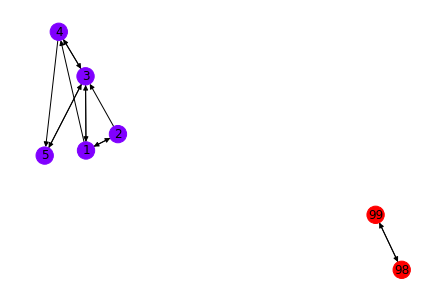

In [ ]:
import numpy as np
# Create a directed graph
G = nx.DiGraph()

# Add edges
for row in g.vertices.collect():
    G.add_node(row['id'])

# Add edges
for row in g.edges.collect():
    G.add_edge(row['src'], row['dst'])

# Create a color map based on the component id
color_map = {}

# Get all unique components and create a color for each of them
pdf = result_scc.orderBy("id").toPandas()
unique_components = pdf[pdf.columns[-1]].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_components)))

for component, color in zip(unique_components, colors):
    color_map[component] = color

# Map the nodes to their colors
node_colors = [color_map[component] for component in pdf[pdf.columns[-1]]]

# Draw the graph
nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()


####Triangle Count:
The triangle count for a node in a graph is a measure of the cohesiveness of the user's immediate network, which can help identify tightly-knit communities.

The Triangle Count algorithm is a graph analysis algorithm that counts the number of triangles in a graph. A triangle in a graph consists of three nodes that are connected to each other, forming a closed loop. The Triangle Count algorithm helps identify the presence of triangles and provides a measure of the cohesiveness or clustering of nodes within a graph.

In [ ]:
# Run Triangle Count algorithm
results_tc = g.triangleCount()

# Display the number of triangles for each user
results_tc.select("id", "count").show()

+---+-----+
| id|count|
+---+-----+
|  1|    2|
|  2|    1|
|  3|    3|
|  4|    2|
|  5|    1|
| 98|    0|
| 99|    0|
+---+-----+



What does the result say about how are people connected in our graph? Take a look at who is connected to who in the data and see if you can match a pattern to what is being reported (the component number is not important, only which nodes have the same component).

<b> Shortest path </b> Graphframes includes a simple shortest path algorithm, it finds the distance between all nodes and a given set of landmarks.

In the example below we will see from each node how many steps does it take to get to a landmark. So for example [5 -> 1, 1 -> 1] would means that to get to vertice named 5 takes 1 edge, to get to a vertice named 1 also takes 1 step.

In [ ]:
g.shortestPaths(landmarks=["1", "5"]).show()

+---+------+---------+---+----------------+
| id|  name|firstname|age|       distances|
+---+------+---------+---+----------------+
|  3| Mills|     Jeff| 80|{5 -> 1, 1 -> 1}|
| 98|  Berg|      Tim| 28|              {}|
| 99|  Page|    Allan| 16|              {}|
|  5| Banks|     Mike| 93|{5 -> 0, 1 -> 2}|
|  1|Carter|  Derrick| 50|{5 -> 2, 1 -> 0}|
|  4|  Hood|   Robert| 65|{5 -> 1, 1 -> 2}|
|  2|   May|  Derrick| 26|{5 -> 2, 1 -> 1}|
+---+------+---------+---+----------------+



<b>Search</b> Breadth-first search (BFS) is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root (or some arbitrary node of a graph, sometimes referred to as a 'search key'[1]), and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.

It uses the opposite strategy as depth-first search, which instead explores the highest-depth nodes first before being forced to backtrack and expand shallower nodes.

For more information on these alogrithms: https://en.wikipedia.org/wiki/Breadth-first_search

Let's apply bfs using the fromExpr and toExpr arguments to find a path from id 1 to id 5.

In [ ]:
g.bfs(fromExpr="id='1'", toExpr = "id='5'").show(10,False)

+------------------------+---------------+---------------------+---------------+--------------------+
|from                    |e0             |v1                   |e1             |to                  |
+------------------------+---------------+---------------------+---------------+--------------------+
|{1, Carter, Derrick, 50}|{1, 4, follows}|{4, Hood, Robert, 65}|{4, 5, follows}|{5, Banks, Mike, 93}|
|{1, Carter, Derrick, 50}|{1, 4, follows}|{4, Hood, Robert, 65}|{4, 5, follows}|{5, Banks, Mike, 93}|
|{1, Carter, Derrick, 50}|{1, 3, friend} |{3, Mills, Jeff, 80} |{3, 5, friend} |{5, Banks, Mike, 93}|
+------------------------+---------------+---------------------+---------------+--------------------+



we can be even more specific for example find a path from id 1 to anyone over 65, but not using any friend edges (edgeFilter argument) and setting a max length of 4 (maxPathLength argument). It can also be useufl to drop duplicates.

In [ ]:
filteredPaths = g.bfs(
  fromExpr = "id = 1",
  toExpr = "age >65",
  edgeFilter = "type != 'friend'",
  maxPathLength = 4).dropDuplicates()
display(filteredPaths)

from,e0,v1,e1,to
"List(1, Carter, Derrick, 50)","List(1, 4, follows)","List(4, Hood, Robert, 65)","List(4, 5, follows)","List(5, Banks, Mike, 93)"


## Exercise

In the following exercises you will use a data extract from instagram that represents a social network. You will need to upload the data to the dbfs using the upload command under file.

Then the below commands will load the data into dataframes to work with.

In [ ]:
nodes_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/instagram_nodes.csv")
edges_df = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/instagram_edges.csv")

Let's take a look at the data:

In [ ]:
display(nodes_df)

node_id,followers,following,posts,likes,comments,age,gender,interests,occupation,location
0,2035,1972,29,195,2836,32,male,['Gaming'],Software Engineer,Vienna
1,147,105,2,0,0,33,male,"['Music', 'Reading', 'Cooking', 'Meditation', 'Yoga']",Architect,Lisbon
2,16321,420,161,170948,1315447,32,female,"['Dancing', 'Fashion', 'Gaming', 'Gardening']",Musician,Prague
3,985,461,6,16,74,42,female,[],Software Engineer,Rome
4,550,80,9,20,50,40,female,[],Doctor,Vienna
5,93875,1438,1497,91499840,63713738,35,male,"['Gaming', 'Reading', 'Filmmaking', 'Sports', 'Dancing']",Musician,Copenhagen
6,1789,572,28,428,834,28,male,[],Doctor,Rome
7,367,244,3,0,0,37,female,"['Gaming', 'Music']",Dancer,Rome
8,81945,1355,511,34874601,79178760,45,male,"['Photography', 'Reading', 'Travel']",Artist,Zurich
9,673,178,2,7,23,33,female,"['DIY', 'Reading', 'Travel', 'Photography']",Dancer,Lisbon


In [ ]:
display(edges_df)

src,dst,follower_following,engagement_likes,engagement_comments,engagement_dms
0,46,B follows A,0,10,3
46,0,B follows A,0,10,3
2,68,A follows B,40,45,8
68,2,A follows B,40,45,8
2,102,A follows B,78,21,6
102,2,A follows B,78,21,6
2,177,B follows A,32,8,6
177,2,B follows A,32,8,6
2,206,A follows B,54,52,18
206,2,A follows B,54,52,18


In [ ]:
# create a graphframes graph from the data:
# Rename node_id column

nodes_df = nodes_df.withColumnRenamed("node_id", "id")

instaGraph = GraphFrame(nodes_df, edges_df)

How many edges and vertices are their in our graph?

In [ ]:
print(instaGraph.vertices.count())
print(instaGraph.edges.count())

250
898


In our dataset who is followed the most (including friends) and who follows the most in our dataset (hint: think degrees)

In [ ]:
instaGraph.outDegrees.orderBy("outDegree", ascending=False).show()

+---+---------+
| id|outDegree|
+---+---------+
|  5|       29|
| 38|       26|
|  8|       23|
| 50|       23|
| 19|       22|
| 11|       22|
| 27|       20|
|147|       20|
|157|       15|
|193|       15|
| 84|       15|
|195|       14|
|144|       14|
| 86|       14|
|119|       13|
|180|       12|
|156|       12|
| 97|       12|
|150|       12|
|129|       11|
+---+---------+
only showing top 20 rows



In [ ]:
instaGraph.inDegrees.orderBy("inDegree", ascending=False).show()

+---+--------+
| id|inDegree|
+---+--------+
|  5|      29|
| 38|      26|
|  8|      23|
| 50|      23|
| 19|      22|
| 11|      22|
| 27|      20|
|147|      20|
|157|      15|
|193|      15|
| 84|      15|
|195|      14|
|144|      14|
| 86|      14|
|119|      13|
|180|      12|
|156|      12|
| 97|      12|
|150|      12|
|129|      11|
+---+--------+
only showing top 20 rows



Apply label propogation algorithm and find how many unique labels exist. Bonus: use Network X to plot a coloured graph

In [ ]:
result_lp = instaGraph.labelPropagation(maxIter=10)


In [ ]:
# Display the detected communities
result_lp.select("id", "label").show()

result_lp.select("label").distinct().show()

+---+-------------+
| id|        label|
+---+-------------+
| 77| 472446402560|
| 30| 163208757249|
|154| 395136991232|
|226| 627065225216|
|172| 850403524609|
| 12| 893353197569|
|187| 395136991232|
| 16|1391569403904|
| 19| 601295421440|
|109| 395136991232|
| 15|  94489280513|
|205| 893353197569|
|228| 627065225216|
|147| 601295421440|
| 82| 919123001346|
| 95| 893353197569|
|145| 893353197569|
|189| 893353197569|
|231| 326417514497|
|237| 395136991232|
+---+-------------+
only showing top 20 rows

+-------------+
|        label|
+-------------+
| 970662608897|
|1236950581248|
| 919123001346|
|1408749273090|
| 627065225216|
| 137438953472|
| 601295421440|
| 850403524609|
|1322849927169|
| 893353197569|
| 395136991232|
| 549755813888|
|1391569403904|
|  94489280513|
| 395136991234|
| 249108103169|
| 163208757249|
| 326417514497|
| 979252543488|
|  94489280512|
+-------------+
only showing top 20 rows



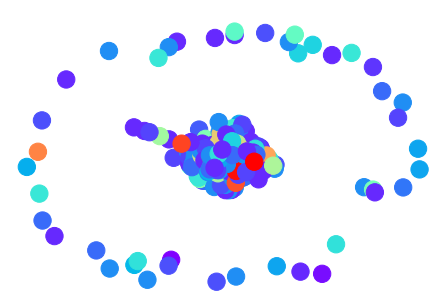

In [ ]:
import numpy as np
# Create a directed graph
G = nx.DiGraph()

# Add edges
for row in instaGraph.vertices.collect():
    G.add_node(row['id'])

# Add edges
for row in instaGraph.edges.collect():
    G.add_edge(row['src'], row['dst'])

# Create a color map based on the component id
color_map = {}

# Get all unique components and create a color for each of them
pdf = result_lp.orderBy("id").toPandas()
unique_components = pdf[pdf.columns[-1]].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_components)))

for component, color in zip(unique_components, colors):
    color_map[component] = color

# Map the nodes to their colors
node_colors = [color_map[component] for component in pdf[pdf.columns[-1]]]

# Draw the graph
nx.draw(G, node_color=node_colors, with_labels=False)
plt.show()


Who is the most influential by pagerank and by number of triangles?

In [ ]:
pageRanks = instaGraph.pageRank(resetProbability=0.15, maxIter = 5)

In [ ]:
pageRanks.vertices.orderBy("pagerank",ascending=False).show()

+---+---------+---------+-----+---------+---------+---+------+--------------------+----------+----------+------------------+
| id|followers|following|posts|    likes| comments|age|gender|           interests|occupation|  location|          pagerank|
+---+---------+---------+-----+---------+---------+---+------+--------------------+----------+----------+------------------+
|  5|    93875|     1438| 1497| 91499840| 63713738| 35|  male|['Gaming', 'Readi...|  Musician|Copenhagen|  8.38753843636091|
| 50|    93025|      202| 1758|133038075|  8692681| 18|  male|['Reading', 'Musi...|  Musician|     Paris| 6.871373805192238|
| 38|    93892|     1741|  896| 77047227|192607826| 18|female|['Nature', 'Yoga'...|    Artist|      Rome| 6.150745473727345|
|  8|    81945|     1355|  511| 34874601| 79178760| 45|  male|['Photography', '...|    Artist|    Zurich| 6.082855286101643|
| 27|    96113|     1922| 1764|147394160|309179989| 40|female|   ['Art', 'Nature']|  Musician| Amsterdam| 5.679514659428024|


For each node find all follower of followers who are not directly followed.

In [ ]:
instaGraph.find("(a)-[]->(b); (b)-[]->(c); !(a)-[]->(c)").dropDuplicates().select("a.id", "c.id").show()

+---+---+
| id| id|
+---+---+
| 80|180|
|168|186|
| 34| 45|
|116|228|
|162| 49|
| 63| 41|
| 38|  5|
|147|171|
| 58|238|
|119| 50|
|167|233|
|130|156|
|196|232|
| 94|154|
|154|229|
|197|181|
|193|197|
| 98| 78|
|106|209|
| 85|135|
+---+---+
only showing top 20 rows



For each node find all mutual followers of mutual followers who are not directly followed or mutually followed.

In [ ]:
instaGraph.find("(a)-[e1]->(b); (b)-[e2]->(c); !(a)-[]->(c)") \
    .where(
"e1.follower_following = 'mutual' and e2.follower_following = 'mutual'") \
    .dropDuplicates().select("a.id", "c.id").show()

+---+---+
| id| id|
+---+---+
+---+---+



What is the shortest distance from our top influencer (by pagerank) to someone older than them?

In [ ]:
filteredPaths = instaGraph.bfs(
  fromExpr = "id = 11",
  toExpr = "age >44",
  maxPathLength = 6).dropDuplicates()
display(filteredPaths)

from,e0,v1,e1,to
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 195, A follows B, 670, 274, 43)","List(195, 47918, 1367, 785, 2414697, 16628802, 22, male, ['Photography', 'Reading', 'Cooking', 'Art', 'Gardening'], Musician, Zurich)","List(195, 8, A and B follow each other, 233, 246, 25)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 198, B follows A, 9, 22, 19)","List(198, 1314, 912, 8, 58, 332, 20, female, ['Nature', 'Gardening', 'Photography', 'Technology'], Yoga Instructor, Rome)","List(198, 8, B follows A, 311, 155, 41)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 195, B follows A, 571, 296, 32)","List(195, 47918, 1367, 785, 2414697, 16628802, 22, male, ['Photography', 'Reading', 'Cooking', 'Art', 'Gardening'], Musician, Zurich)","List(195, 8, A and B follow each other, 233, 246, 25)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 145, B follows A, 123, 31, 24)","List(145, 2203, 1181, 40, 1756, 3171, 35, female, ['Gardening'], Writer, Zurich)","List(145, 8, B follows A, 154, 88, 11)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 135, B follows A, 107, 22, 28)","List(135, 236, 144, 3, 0, 3, 21, male, ['Gardening', 'Fashion', 'Art'], Writer, Zurich)","List(135, 8, B follows A, 328, 56, 25)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 77, B follows A, 220, 63, 10)","List(77, 2123, 473, 36, 549, 1120, 25, female, [], Software Engineer, Zurich)","List(77, 8, B follows A, 410, 98, 27)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 145, A follows B, 283, 81, 10)","List(145, 2203, 1181, 40, 1756, 3171, 35, female, ['Gardening'], Writer, Zurich)","List(145, 8, B follows A, 154, 88, 11)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 20, A follows B, 107, 47, 26)","List(20, 1388, 113, 23, 89, 996, 25, female, [], Nurse, Zurich)","List(20, 8, B follows A, 74, 101, 10)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"
"List(11, 40441, 1931, 314, 2225186, 3991000, 44, female, ['Gardening', 'Gaming', 'Dancing', 'Reading'], Artist, Zurich)","List(11, 244, B follows A, 151, 85, 32)","List(244, 1899, 362, 15, 446, 438, 19, male, ['Fashion'], Social Worker, Zurich)","List(244, 8, B follows A, 399, 99, 47)","List(8, 81945, 1355, 511, 34874601, 79178760, 45, male, ['Photography', 'Reading', 'Travel'], Artist, Zurich)"


## Bonus Exercise: Bikeshare

Here is your chance to apply what you have learned to some real data. We will be using a bike sharing dataset, but a very different one from last class

Here you’re going to be working with publicly available bike data from the Bay Area Bike Share portal, specifically analyzing the 2017 year of data. First we will download the data and read it into spark, we will also rename some of the columns to meet the requirements of graphframes.

In [ ]:
%sh wget https://raw.githubusercontent.com/udacity/data-analyst/master/projects/bike_sharing/201508_trip_data.csv

--2023-11-20 15:25:14--  https://raw.githubusercontent.com/udacity/data-analyst/master/projects/bike_sharing/201508_trip_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43012650 (41M) [text/plain]
Saving to: ‘201508_trip_data.csv’

     0K .......... .......... .......... .......... ..........  0% 5.30M 8s
    50K .......... .......... .......... .......... ..........  0% 6.21M 7s
   100K .......... .......... .......... .......... ..........  0% 5.18M 7s
   150K .......... .......... .......... .......... ..........  0% 50.4M 6s
   200K .......... .......... .......... .......... ..........  0% 22.4M 5s
   250K .......... .......... .......... .......... ..........  0% 9.72M 5s
   300K .......... .......... .......... .......... ..........  0% 66.9

In [ ]:
%sh wget https://raw.githubusercontent.com/udacity/data-analyst/master/projects/bike_sharing/201508_station_data.csv

--2023-11-20 15:25:17--  https://raw.githubusercontent.com/udacity/data-analyst/master/projects/bike_sharing/201508_station_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5272 (5.1K) [text/plain]
Saving to: ‘201508_station_data.csv’

     0K .....                                                 100% 29.7M=0s

2023-11-20 15:25:17 (29.7 MB/s) - ‘201508_station_data.csv’ saved [5272/5272]



In [ ]:
tripDF = spark.read.csv('file:/databricks/driver/201508_trip_data.csv',header=True, inferSchema = True)
tripDF.printSchema()

root
 |-- Trip ID: integer (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- Start Station: string (nullable = true)
 |-- Start Terminal: integer (nullable = true)
 |-- End Date: string (nullable = true)
 |-- End Station: string (nullable = true)
 |-- End Terminal: integer (nullable = true)
 |-- Bike #: integer (nullable = true)
 |-- Subscriber Type: string (nullable = true)
 |-- Zip Code: string (nullable = true)



In [ ]:
stationDF = spark.read.csv('file:/databricks/driver/201508_station_data.csv',header=True, inferSchema = True)
stationDF.printSchema()

root
 |-- station_id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- dockcount: integer (nullable = true)
 |-- landmark: string (nullable = true)
 |-- installation: string (nullable = true)



In [ ]:
stationVertices = stationDF.withColumnRenamed("name", "id").distinct()
tripEdges = tripDF.withColumnRenamed("Start Station", "src").withColumnRenamed("End Station", "dst")

In [ ]:
tripEdges.show(10, False)

+-------+--------+---------------+---------------------------------------------+--------------+---------------+---------------------------------------------+------------+------+---------------+--------+
|Trip ID|Duration|Start Date     |src                                          |Start Terminal|End Date       |dst                                          |End Terminal|Bike #|Subscriber Type|Zip Code|
+-------+--------+---------------+---------------------------------------------+--------------+---------------+---------------------------------------------+------------+------+---------------+--------+
|913460 |765     |8/31/2015 23:26|Harry Bridges Plaza (Ferry Building)         |50            |8/31/2015 23:39|San Francisco Caltrain (Townsend at 4th)     |70          |288   |Subscriber     |2139    |
|913459 |1036    |8/31/2015 23:11|San Antonio Shopping Center                  |31            |8/31/2015 23:28|Mountain View City Hall                      |27          |35    |Subscriber 

In [ ]:
stationVertices.show(10, False)

+----------+---------------------------------+---------+-----------+---------+--------+------------+
|station_id|id                               |lat      |long       |dockcount|landmark|installation|
+----------+---------------------------------+---------+-----------+---------+--------+------------+
|9         |Japantown                        |37.348742|-121.894715|15       |San Jose|8/5/2013    |
|7         |Paseo de San Antonio             |37.333798|-121.886943|15       |San Jose|8/7/2013    |
|12        |SJSU 4th at San Carlos           |37.332808|-121.883891|19       |San Jose|8/7/2013    |
|5         |Adobe on Almaden                 |37.331415|-121.8932  |19       |San Jose|8/5/2013    |
|6         |San Pedro Square                 |37.336721|-121.894074|15       |San Jose|8/7/2013    |
|8         |San Salvador at 1st              |37.330165|-121.885831|15       |San Jose|8/5/2013    |
|10        |San Jose City Hall               |37.337391|-121.886995|15       |San Jose|8/6/

Alright you now have the data formatted as you need to perform analysis. Take a look to make sure you understand what the data is. Basically you have bike stations (verticies) and trips between the stations (edges). 

Hint: in the cell above I used 'False' in the `show()`, this will be useful for you to prevent truncating station names. The highest ranked station should be San Jose Diridon Caltrain Station.

#####Create a graphframe and perform a pagerank to find the most import stations (make sure to set the maxIterations to 5).

In [ ]:
#take the vertices and edges DataFrames and returns a GraphFrames object.
gbs = GraphFrame(stationVertices, tripEdges)

In [ ]:
#show the edges
gbs.edges.show(10, False)

+-------+--------+---------------+---------------------------------------------+--------------+---------------+---------------------------------------------+------------+------+---------------+--------+
|Trip ID|Duration|Start Date     |src                                          |Start Terminal|End Date       |dst                                          |End Terminal|Bike #|Subscriber Type|Zip Code|
+-------+--------+---------------+---------------------------------------------+--------------+---------------+---------------------------------------------+------------+------+---------------+--------+
|913460 |765     |8/31/2015 23:26|Harry Bridges Plaza (Ferry Building)         |50            |8/31/2015 23:39|San Francisco Caltrain (Townsend at 4th)     |70          |288   |Subscriber     |2139    |
|913459 |1036    |8/31/2015 23:11|San Antonio Shopping Center                  |31            |8/31/2015 23:28|Mountain View City Hall                      |27          |35    |Subscriber 

In [ ]:
#Run the pageRank()
pageRanks = gbs.pageRank(resetProbability=0.15, maxIter = 5)

In [ ]:
#Show() the vertices, ranked
pageRanks.vertices.orderBy(pageRanks.vertices.pagerank,ascending=False).show(10,False)

+----------+----------------------------------------+---------+-----------+---------+-------------+------------+------------------+
|station_id|id                                      |lat      |long       |dockcount|landmark     |installation|pagerank          |
+----------+----------------------------------------+---------+-----------+---------+-------------+------------+------------------+
|2         |San Jose Diridon Caltrain Station       |37.329732|-121.901782|27       |San Jose     |8/6/2013    |4.084086216116642 |
|70        |San Francisco Caltrain (Townsend at 4th)|37.776617|-122.39526 |19       |San Francisco|8/23/2013   |3.3515435057991225|
|28        |Mountain View Caltrain Station          |37.394358|-122.076713|23       |Mountain View|8/15/2013   |2.553118368819579 |
|22        |Redwood City Caltrain Station           |37.486078|-122.232089|25       |Redwood City |8/15/2013   |2.4734490963466933|
|69        |San Francisco Caltrain 2 (330 Townsend) |37.7766  |-122.39547 |2

One question is: what are the most common trip paths? You can do this by performing a grouping operator and adding the edge counts together, think of how we used sparkSQL to implement SQL like queries last week. Remember the list of edges is just a dataframe so you can use SQL queries to find a result like this. In case you have forgotten this link has some information on groupBy:

https://sparkbyexamples.com/spark/using-groupby-on-dataframe/

The most common trip should be:

San Francisco Caltrain 2 (330 Townsend)  ->    Townsend at 7th.

In [ ]:
tripEdgesSum = tripEdges.groupBy(tripEdges.src, tripEdges.dst).count()
tripEdgesSum.orderBy("count",ascending=False).show(10, False)

+---------------------------------------------+----------------------------------------+-----+
|src                                          |dst                                     |count|
+---------------------------------------------+----------------------------------------+-----+
|San Francisco Caltrain 2 (330 Townsend)      |Townsend at 7th                         |3748 |
|Harry Bridges Plaza (Ferry Building)         |Embarcadero at Sansome                  |3145 |
|2nd at Townsend                              |Harry Bridges Plaza (Ferry Building)    |2973 |
|Townsend at 7th                              |San Francisco Caltrain 2 (330 Townsend) |2734 |
|Harry Bridges Plaza (Ferry Building)         |2nd at Townsend                         |2640 |
|Embarcadero at Folsom                        |San Francisco Caltrain (Townsend at 4th)|2439 |
|Steuart at Market                            |2nd at Townsend                         |2356 |
|Embarcadero at Sansome                       |Ste

Create a new graphframe with only unique edges (you can use the dataframe you created above) and check if all stations are connected.

In [ ]:
#Create a gbsUnique graphframe
gbsUnique = GraphFrame(stationVertices, tripEdgesSum)

In [ ]:
#Computes the strongly connected component membership of each vertex and returns a graph with each vertex assigned a component ID.
cc = gbsUnique.connectedComponents()


In [ ]:
#show the graphframe with component
cc.select("id","component").orderBy("component").show()

Remember that in this instance you’ve got a directed graph. That means that your trips are directional - from one location to another. Therefore you get access to a wealth of analysis that you can use. You can find the number of trips that go into a specific station and leave from a specific station.

One interesting question you could ask is what is the station with the highest ratio of in degrees to out degrees. As in, what station acts as a pure trip sink. A station where trips end at but rarely start from. This station will end up with a lot of excess bikes that will need to be re-distributed.

In [ ]:
from pyspark.sql.functions import col
gbsOut = gbs.outDegrees
gbsIn = gbs.inDegrees
# Note you may find it easier to use q SQL query here if that is what you are used to
gbsJoin = gbsIn.join(gbsOut, ["id"])
gbsDeg = gbsJoin.withColumn("Ratio", col("inDegree") / col("outDegree"))

In [ ]:
gbsJoin.printSchema()

In [ ]:
gbsDeg.orderBy("Ratio",ascending=False).show(10)

Consider the station with the highest ratio of intrips to outtrips, find all stations connected by 1 or 2 trips to this station using motifs.

In [ ]:
#search for pairs of vertices a,b connected by edges in both directions
motifsBS = gbsUnique.find("(a)-[]->(b); (b)-[]->(c)").dropDuplicates()

In [ ]:
# Find stations connected by two trips
filteredBS = motifsBS.filter("a.id = 'Redwood City Medical Center'")
filteredBS.show(10)

In [ ]:
#store the intermediate computation so they can be reused in subsequent actions.
filteredBS.persist()

In [ ]:
#count the number os connections
filteredBS.count()

In [ ]:
# Find stations connected by one trip
motifsBS1 = gbsUnique.find("(a)-[]->(b)").dropDuplicates()
motifsBS1.filter("a.id = 'Redwood City Medical Center'").count()